In [9]:
import numpy as np
import cv2 as cv
import glob
# import pickle
import matplotlib.pyplot as plt

In [13]:
################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################
chessboardSize = (6,4)
frameSize = (864,1152)
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [14]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

size_of_chessboard_squares_mm = 20
objp = objp * size_of_chessboard_squares_mm

In [15]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


images = glob.glob('images/*.jpg')
# images = images[0:8]
for image in images:

    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    # If found, add object points, image points (after refining them)
    if ret == True:

        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        # Create a named window with fixed size
        cv.namedWindow('img', cv.WINDOW_NORMAL)
        cv.resizeWindow('img', 800, 600)
        cv.imshow('img', img)
        cv.waitKey(1000)


cv.destroyAllWindows()

In [16]:
############## CALIBRATION #######################################################
ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
# pickle.dump((cameraMatrix, dist), open( "calibration.pkl", "wb" ))
# pickle.dump(cameraMatrix, open( "cameraMatrix.pkl", "wb" ))
# pickle.dump(dist, open( "dist.pkl", "wb" ))

In [17]:
############## UNDISTORTION #####################################################
img = cv.imread('test.jpg')
h,  w = img.shape[:2]
newCameraMatrix, roi = cv.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))

# Undistort
dst = cv.undistort(img, cameraMatrix, dist, None, newCameraMatrix)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('undistorted.jpg', dst)




# # Undistort with Remapping
# mapx, mapy = cv.initUndistortRectifyMap(cameraMatrix, dist, None, newCameraMatrix, (w,h), 5)
# dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

# # crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
# cv.imwrite('caliResult2.png', dst)




# Reprojection Error
mean_error = 0

for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], cameraMatrix, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error

print( "total error: {}".format(mean_error/len(objpoints)) )


total error: 0.08203193459747467


In [18]:
img.shape

(864, 1152, 3)

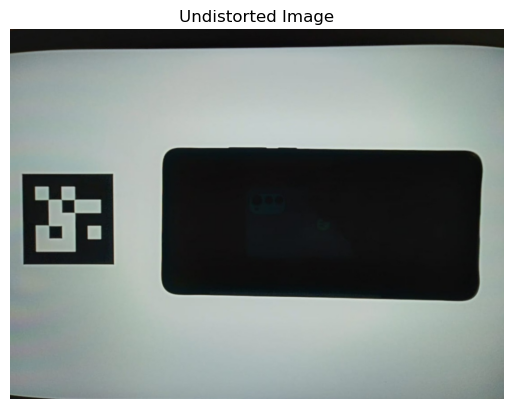

In [19]:
import matplotlib.pyplot as plt
import cv2

# Assuming you have already undistorted the image and saved it as 'undistorted.png'
undistorted_img = cv2.imread('undistorted.jpg')

# Display the undistorted image using Matplotlib
plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.title('Undistorted Image')
plt.axis('off')  # Turn off axis labels
plt.show()
